Now we want to reduce the dimensionality of the proteomic data.
First, we retrieve the stored data.

In [2]:
%store -r normal_patients
%store -r normal_prot
%store -r all_patients
%store -r all_prot

In [ ]:
import numpy as np
import pandas as pd
%conda install scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
print(all_prot.max().max())
print(all_prot.min().min())

7.796314684465253
-7.985884888123239


We want our data to be normalized for PCA. The data is pretty widely spread. However, negative values mean it's not just raw expression data. It's likely been transformed already.
Let's do some more math to see what we're looking at.

In [49]:
prot_dist_stats = all_prot.describe().T[['mean','std']]
print(prot_dist_stats['mean'].min())
print(prot_dist_stats['mean'].max())
print(prot_dist_stats['std'].min())
print(prot_dist_stats['std'].max())

-4.533969510866671
2.0996212270047736
0.11167970676536301
2.98387673374958


This indicates the data has probably been centered, but not normalized.
Let's scale each protein to be normalized.

In [27]:
scaler = StandardScaler()
prot_scaled = pd.DataFrame(
    scaler.fit_transform(all_prot), 
    index=all_prot.index, 
    columns=all_prot.columns
)
prot_scaled

/opt/anaconda3/envs/bio362/lib/python3.11/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/bio362/lib/python3.11/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/envs/bio362/lib/python3.11/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Name,ARF5,M6PR,ESRRA,FKBP4,NDUFAF7,FUCA2,DBNDD1,SEMA3F,CFTR,CYP51A1,...,DDHD1,WIZ,GBF1,APOA5,WIZ,LDB1,WIZ,RFX7,SWSAP1,SVIL
Database_ID,ENSP00000000233.5,ENSP00000000412.3,ENSP00000000442.6,ENSP00000001008.4,ENSP00000002125.4,ENSP00000002165.5,ENSP00000002501.6,ENSP00000002829.3,ENSP00000003084.6,ENSP00000003100.8,...,ENSP00000500986.2,ENSP00000500993.1,ENSP00000501064.1,ENSP00000501141.1,ENSP00000501256.3,ENSP00000501277.1,ENSP00000501300.1,ENSP00000501317.1,ENSP00000501355.1,ENSP00000501521.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01BR001,0.188284,-1.814247,NaN,-0.666932,2.888948,-0.752438,1.420498,-0.411501,NaN,-0.142503,...,-1.362787,-1.327957,-0.919117,NaN,NaN,-1.654606,-0.290793,-0.334686,-1.038080,NaN
01BR008,-1.236712,1.437186,0.421297,-0.807571,1.120189,-1.032339,-2.042332,-0.577602,-0.340193,0.234808,...,1.540711,NaN,0.105539,NaN,NaN,-0.120659,0.708855,0.682004,-1.617735,NaN
01BR009,-0.415389,0.173460,0.755232,-0.506623,3.217055,-0.938549,-0.303962,0.235078,-0.705326,0.693133,...,1.129658,NaN,-1.372489,NaN,NaN,-0.596078,0.362824,0.782083,-0.702105,NaN
01BR010,0.440114,1.180979,-0.808225,-1.287785,0.434174,-0.727899,-0.139721,0.271867,NaN,1.195923,...,-0.851456,NaN,1.400585,NaN,NaN,-1.133106,-0.394588,0.387457,-1.874066,0.613515
01BR015,-1.222947,-1.648399,NaN,-0.008252,-0.588847,-0.557360,0.563014,0.146210,NaN,-0.796452,...,1.028137,-1.143365,-0.785598,NaN,NaN,0.109407,3.209620,-0.169682,-0.181832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21BR010,1.584004,0.074477,-1.196397,-0.075532,-0.002527,1.122262,0.367695,0.458972,0.869647,-0.059968,...,-0.281975,1.255194,1.031448,NaN,-0.636325,-0.125450,-0.805658,-0.308279,-1.002666,0.542512
22BR005,-1.331816,0.679751,NaN,1.247367,-0.449744,0.138453,-0.158708,0.530704,NaN,-0.263727,...,1.902622,NaN,0.653675,NaN,NaN,0.110199,-0.736742,0.252909,NaN,0.390202


In [48]:
scaled_dist_stats = prot_scaled.describe().T[['mean','std']]
scaled_dist_stats


,,mean,std
Name,Database_ID,,
ARF5,ENSP00000000233.5,-5.460113e-18,1.004124
M6PR,ENSP00000000412.3,-1.072116e-17,1.004124
ESRRA,ENSP00000000442.6,-3.249433e-17,1.006154
FKBP4,ENSP00000001008.4,0.000000e+00,1.004124
NDUFAF7,ENSP00000002125.4,-7.280151e-18,1.004124
...,...,...,...
LDB1,ENSP00000501277.1,-1.192978e-17,1.004124
WIZ,ENSP00000501300.1,-2.411550e-17,1.004124
RFX7,ENSP00000501317.1,-1.071268e-17,1.004415


We'll have to reselect the proteomics data for just the patients of interest rather than separately normalizing them. But let's cross that bridge when we come to it.
We'll also need to remove Na values.

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
prot_prepped = imputer.fit_transform(prot_scaled)

/opt/anaconda3/envs/bio362/lib/python3.11/site-packages/sklearn/impute/_base.py:637: UserWarning: Skipping features without any observed values: [  676  1320  1479  1698  1727  2692  2710  4034  4100  4113  4888  5598
  5878  6752  7409  7516  7861  8148  8654  8690  9092  9172  9221  9251
  9461  9953  9993 10019 10287 10414 10436 10624 11136 11167 11187 11536
 11920 11923 12122 12157]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [56]:
pca = PCA(n_components=2)

x_pca = pca.fit_transform(prot_prepped)
print("Original shape: ", prot_prepped.shape)
print("Reduced shape: ", x_pca.shape)
print("Explained variance ratio: ", sum(pca.explained_variance_ratio_))


Original shape:  (122, 12882)
Reduced shape:  (122, 2)
Explained variance ratio:  0.1766521008578622


In [45]:
%conda install matplotlib
import matplotlib.pyplot as plt


^C

Note: you may need to restart the kernel to use updated packages.


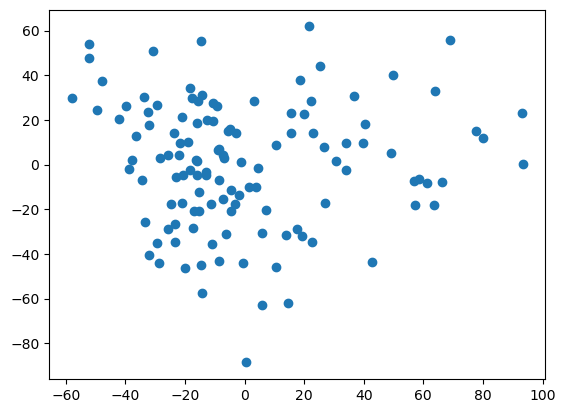

In [34]:
plt.plot(x_pca[:,0], x_pca[:,1], 'o')
plt.show()

In [ ]:
x_pca

In [58]:
prot_pca = pd.DataFrame(
    x_pca, 
    index=all_prot.index, 
    columns=['PC1', 'PC2']
)
prot_pca

,PC1,PC2
Patient_ID,,
01BR001,18.664470,37.834286
01BR008,56.939423,-7.476572
01BR009,15.430017,14.268707
01BR010,-13.015236,-4.802339
01BR015,-4.784476,16.165613
...,...,...
21BR010,-34.379568,-6.725676
22BR005,1.640505,-10.220026
22BR006,-24.854491,-17.756276


In [ ]:
pca_of_interest = prot_pca.loc[normal_patients]
pca_of_interest

,PC1,PC2
Patient_ID,,
01BR023,0.371703,-88.641233
01BR025,7.284308,-20.372416
03BR002,-25.848344,4.162150
03BR005,-52.324981,54.105864
05BR001,19.884764,22.815370
05BR003,-18.848299,10.158451
11BR015,5.952172,-62.815782
11BR027,-32.026862,-40.327147
11BR049,-4.500974,-11.423860


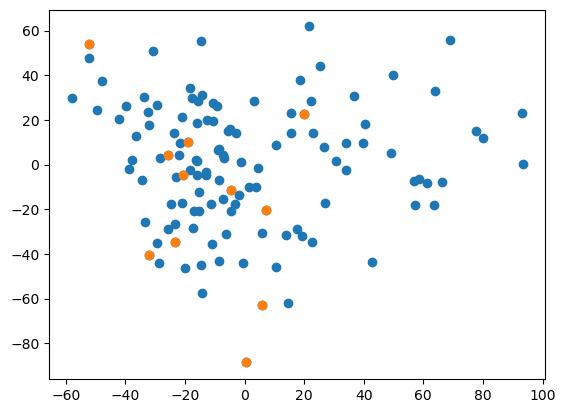

In [61]:
plt.plot(prot_pca['PC1'], prot_pca['PC2'], 'o')
plt.plot(pca_of_interest['PC1'], pca_of_interest['PC2'], 'o')
plt.show()

There it is! Our patients without driver mutations or significant copy number variations are in orange, while the other patients are in orange. Looking at this, they don't seem to be clustering differently than the other patients. However, we have to remember that this only shows two principal components that explain only about ~18% of the variance. Let's use an actual metric to see if they're measurably different or not.